In [4]:
#importing the libraries
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score,roc_curve,roc_auc_score
from sklearn import metrics
import warnings
import itertools
warnings.filterwarnings("ignore")


In [5]:
data = pd.read_csv("data.txt", delimiter = ' ',
                   names=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels' 

],header=None,)

In [6]:
data.head()

,age,sex,chestpaintype,blood-pressure,serumcholesterol,fastingbloodsugar,electrocardiographicresults,maxhearrate,exerciseangina,oldpeak,slopepeakexercise,noofmajorvessels,reversable-defect,labels
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [ ]:
data.shape

(270, 14)

In [ ]:
#describes the whole dataset
data.describe()

,age,sex,chestpaintype,blood-pressure,serumcholesterol,fastingbloodsugar,electrocardiographicresults,maxhearrate,exerciseangina,oldpeak,slopepeakexercise,noofmajorvessels,reversable-defect,labels
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [ ]:
#checks if any columns/rows have null values
data.isnull().sum()

age                            0
sex                            0
chestpaintype                  0
blood-pressure                 0
serumcholesterol               0
fastingbloodsugar              0
electrocardiographicresults    0
maxhearrate                    0
exerciseangina                 0
oldpeak                        0
slopepeakexercise              0
noofmajorvessels               0
reversable-defect              0
labels                         0
dtype: int64

In [ ]:
#splitting the dataset into features and labels
x = data.iloc[:,:13].values
y = data['labels'].values

In [ ]:
#splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
#performing feature scaling for the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#NAIVE BAYES
#importing the and training the model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
#testing the model
y_pred = classifier.predict(x_test) 

In [ ]:
#calculating the metrics NAIVE BAYES
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accNB=str(accuracy_score(y_test, y_pred))
conf_sensitivityNB = (TP / float(TP + FN))
conf_specificityNB = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivityNB,2)}') 
print(f'Specificity: {round(conf_specificityNB,2)}')



Accuracy score: 0.8148148148148148

Confusion matrix: 
[[24  4]
 [ 6 20]]
F1 score: 0.8148148148148148
Sensitivity: 0.77
Specificity: 0.86


In [ ]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
    

In [ ]:
#calculating the metrics KNN
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accKNN=str(accuracy_score(y_test, y_pred))
conf_sensitivityKNN = (TP / float(TP + FN))
conf_specificityKNN = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivityKNN,2)}') 
print(f'Specificity: {round(conf_specificityKNN,2)}') 

Accuracy score: 0.7777777777777778

Confusion matrix: 
[[25  3]
 [ 9 17]]
F1 score: 0.7777777777777778
Sensitivity: 0.65
Specificity: 0.89


In [ ]:
#DecsionTree
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
ppn.fit(x_train, y_train)
y_pred=ppn.predict(x_test)

In [ ]:
#calculating the metrics Decision Tree
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accDT=str(accuracy_score(y_test, y_pred))
conf_sensitivityDT = (TP / float(TP + FN))
conf_specificityDT = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivityDT,2)}') 
print(f'Specificity: {round(conf_specificityDT,2)}') 

Accuracy score: 0.7407407407407407

Confusion matrix: 
[[26  2]
 [12 14]]
F1 score: 0.7407407407407407
Sensitivity: 0.54
Specificity: 0.93


In [ ]:
#developing LDA Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lr = LinearDiscriminantAnalysis()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


In [ ]:
#calculating the metrics LDA
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accLDA=str(accuracy_score(y_test, y_pred))
conf_sensitivityLDA = (TP / float(TP + FN))
conf_specificityLDA = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivityLDA,2)}') 
print(f'Specificity: {round(conf_specificityLDA,2)}') 

Accuracy score: 0.8148148148148148

Confusion matrix: 
[[24  4]
 [ 6 20]]
F1 score: 0.8148148148148148
Sensitivity: 0.77
Specificity: 0.86


In [ ]:
#developing QDA Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)


In [ ]:
#calculating the metrics QDA
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accQDA=str(accuracy_score(y_test, y_pred))
conf_sensitivityQDA = (TP / float(TP + FN))
conf_specificityQDA = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivityQDA,2)}') 
print(f'Specificity: {round(conf_specificityQDA,2)}') 

Accuracy score: 0.7777777777777778

Confusion matrix: 
[[24  4]
 [ 8 18]]
F1 score: 0.7777777777777778
Sensitivity: 0.69
Specificity: 0.86


In [ ]:
#Importing libraries to implement SFFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.feature_selection import SequentialFeatureSelector as SFFS
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

                                   feature_idx  \
1                                        (12,)   
2                                     (11, 12)   
3                                  (8, 11, 12)   
4                               (7, 8, 11, 12)   
5                            (2, 7, 8, 11, 12)   
6                         (2, 6, 7, 8, 11, 12)   
7                      (2, 6, 7, 8, 9, 11, 12)   
8                   (1, 2, 6, 7, 8, 9, 11, 12)   
9                (1, 2, 5, 6, 7, 8, 9, 11, 12)   
10            (0, 1, 2, 5, 6, 7, 8, 9, 11, 12)   
11         (0, 1, 2, 3, 5, 6, 7, 8, 9, 11, 12)   
12      (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.24074074074074073, -0.24074074074074073, -... -0.237037   
2   [-0.2037037037037037, -0.2222222222222222, -0.... -0.207407   
3   [-0.25925925925925924, -0.18518518518518517, -... -0.188889   
4   [-0.2037037037037037, -0.14

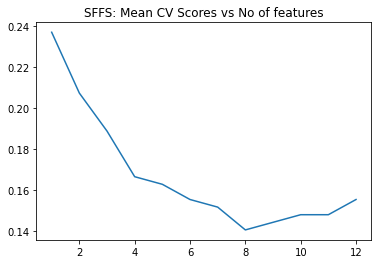

In [ ]:
#RUNNING SFFS FOR NAIVE
sffs = SFS(classifier, 
          k_features=(1,13), 
          forward=True, 
          floating=True, # Floating
          scoring='neg_mean_squared_error',
          cv=5)
data.columns=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels']
X=data[['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect']]
y=data['labels']

#FITTING SFFS
sffs = sffs.fit(X.values, y.values)
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation score
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

#PLOTTING SFFFS FOR NAIVE
fig4=plt.plot(m,n)
fig4=plt.title('SFFS: Mean CV Scores vs No of features')
fig4.figure.savefig('fig1.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print ("No of features=",idx)
#Get the features indices for the best backward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print("#################################################################################")
# Index the column names. 
# Features from forward fit
print("Features selected in forward floating fit")
print(X.columns[b])

In [ ]:
#CREATING NEW MODEL AFTER SFFS- NAIVE
X_updated=data.iloc[:,b]
x_train, x_test, y_train, y_test = train_test_split(X_updated, y, test_size = 0.2)
classifier.fit(x_train, y_train)
#testing the model
y_pred = classifier.predict(x_test) 


In [ ]:
#CALCULATING METRICES AFTER SFFS- NAIVE
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accSNB=str(accuracy_score(y_test, y_pred))
conf_sensitivitySNB = (TP / float(TP + FN))
conf_specificitySNB = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivitySNB,2)}') 
print(f'Specificity: {round(conf_specificitySNB,2)}') 

Accuracy score: 0.8333333333333334

Confusion matrix: 
[[24  6]
 [ 3 21]]
F1 score: 0.8333333333333334
Sensitivity: 0.88
Specificity: 0.8


                                   feature_idx  \
1                                        (11,)   
2                                      (1, 11)   
3                                  (1, 11, 12)   
4                              (2, 10, 11, 12)   
5                           (1, 2, 10, 11, 12)   
6                        (1, 2, 6, 10, 11, 12)   
7                     (1, 2, 5, 6, 10, 11, 12)   
8                  (1, 2, 5, 6, 9, 10, 11, 12)   
9               (1, 2, 5, 6, 8, 9, 10, 11, 12)   
10           (0, 1, 2, 5, 6, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.25925925925925924, -0.3888888888888889, -0... -0.318519   
2   [-0.16666666666666666, -0.24074074074074073, -... -0.233333   
3   [-0.2037037037037037, -0.16666666666666666, -0...  -0.22963   
4   [-0.18518518518518517, -0.1

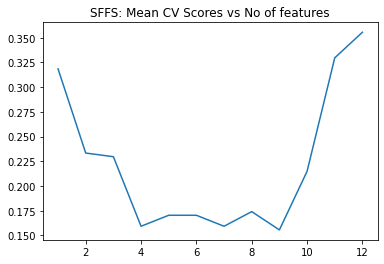

In [ ]:
#RUNNING SFFS FOR KNN
sffs = SFS(knn, 
          k_features=(1,13), 
          forward=True, 
          floating=True, # Floating
          scoring='neg_mean_squared_error',
          cv=5)
data.columns=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels']
X=data[['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect']]
y=data['labels']

#FITTING SFFS
sffs = sffs.fit(X.values, y.values)
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation score
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

#PLOTTING SFFFS FOR KNN
fig4=plt.plot(m,n)
fig4=plt.title('SFFS: Mean CV Scores vs No of features')
fig4.figure.savefig('fig2.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print ("No of features=",idx)
#Get the features indices for the best backward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print("#################################################################################")
# Index the column names. 
# Features from forward fit
print("Features selected in forward floating fit")
print(X.columns[b])

In [ ]:
#CREATING NEW MODEL AFTER SFFS- KNN
X_updated=data.iloc[:,b]
x_train, x_test, y_train, y_test = train_test_split(X_updated, y, test_size = 0.2)
knn.fit(x_train, y_train)
#testing the model
y_pred = knn.predict(x_test) 


In [ ]:
#CALCULATING METRICES AFTER SFFS- KNN
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accSKNN=str(accuracy_score(y_test, y_pred)) 
conf_sensitivitySKNN = (TP / float(TP + FN))
conf_specificitySKNN = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivitySKNN,2)}') 
print(f'Specificity: {round(conf_specificitySKNN,2)}') 

Accuracy score: 0.8148148148148148

Confusion matrix: 
[[32  3]
 [ 7 12]]
F1 score: 0.8148148148148148
Sensitivity: 0.63
Specificity: 0.91


                                   feature_idx  \
1                                        (12,)   
2                                     (11, 12)   
3                                  (2, 11, 12)   
4                               (1, 2, 11, 12)   
5                            (1, 2, 5, 11, 12)   
6                         (1, 2, 5, 6, 11, 12)   
7                      (1, 2, 3, 5, 6, 11, 12)   
8                   (1, 2, 3, 5, 6, 8, 11, 12)   
9                (1, 2, 3, 5, 6, 8, 9, 11, 12)   
10            (0, 1, 2, 4, 5, 6, 8, 9, 11, 12)   
11        (0, 1, 2, 4, 5, 6, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.2962962962962963, -0.24074074074074073, -0... -0.248148   
2   [-0.24074074074074073, -0.2037037037037037, -0... -0.211111   
3   [-0.24074074074074073, -0.14814814814814814, -... -0.155556   
4   [-0.24074074074074073, -0.1

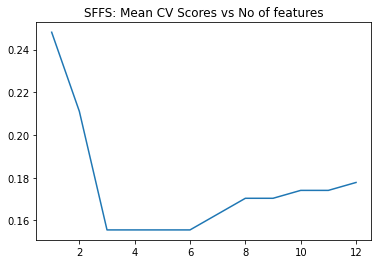

In [ ]:
#RUNNING SFFS FOR DT
sffs = SFS(ppn, 
          k_features=(1,13), 
          forward=True, 
          floating=True, # Floating
          scoring='neg_mean_squared_error',
          cv=5)
data.columns=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels']
X=data[['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect']]
y=data['labels']

#FITTING SFFS
sffs = sffs.fit(X.values, y.values)
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation score
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

#PLOTTING SFFFS FOR DT
fig4=plt.plot(m,n)
fig4=plt.title('SFFS: Mean CV Scores vs No of features')
fig4.figure.savefig('fig3.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print ("No of features=",idx)
#Get the features indices for the best backward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print("#################################################################################")
# Index the column names. 
# Features from forward fit
print("Features selected in forward floating fit")
print(X.columns[b])

In [ ]:
#CREATING NEW MODEL AFTER SFFS- DT
X_updated=data.iloc[:,b]
x_train, x_test, y_train, y_test = train_test_split(X_updated, y, test_size = 0.2)
ppn.fit(x_train, y_train)
#testing the model
y_pred = ppn.predict(x_test) 


In [ ]:
#CALCULATING METRICES AFTER SFFS- DT
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accSDT=str(accuracy_score(y_test, y_pred)) 
conf_sensitivitySDT = (TP / float(TP + FN))
conf_specificitySDT = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivitySDT,2)}') 
print(f'Specificity: {round(conf_specificitySDT,2)}') 

Accuracy score: 0.8518518518518519

Confusion matrix: 
[[27  3]
 [ 5 19]]
F1 score: 0.8518518518518519
Sensitivity: 0.79
Specificity: 0.9


                                   feature_idx  \
1                                        (12,)   
2                                     (11, 12)   
3                                  (8, 11, 12)   
4                               (2, 8, 11, 12)   
5                            (1, 2, 8, 11, 12)   
6                         (1, 2, 8, 9, 11, 12)   
7                      (1, 2, 5, 8, 9, 11, 12)   
8                   (0, 1, 2, 5, 8, 9, 11, 12)   
9                (0, 1, 2, 5, 7, 8, 9, 11, 12)   
10           (0, 1, 2, 5, 7, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 5, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.24074074074074073, -0.24074074074074073, -... -0.237037   
2   [-0.2037037037037037, -0.2037037037037037, -0.... -0.207407   
3   [-0.18518518518518517, -0.16666666666666666, -... -0.166667   
4   [-0.18518518518518517, -0.1

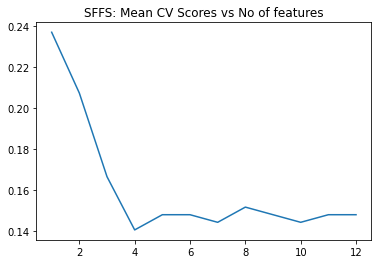

In [ ]:
#RUNNING SFFS FOR LDA
sffs = SFS(lr, 
          k_features=(1,13), 
          forward=True, 
          floating=True, # Floating
          scoring='neg_mean_squared_error',
          cv=5)
data.columns=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels']
X=data[['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect']]
y=data['labels']

#FITTING SFFS
sffs = sffs.fit(X.values, y.values)
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation score
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

#PLOTTING SFFFS FOR KNN
fig4=plt.plot(m,n)
fig4=plt.title('SFFS: Mean CV Scores vs No of features')
fig4.figure.savefig('fig4.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print ("No of features=",idx)
#Get the features indices for the best backward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print("#################################################################################")
# Index the column names. 
# Features from forward fit
print("Features selected in forward floating fit")
print(X.columns[b])

In [ ]:
#CREATING NEW MODEL AFTER SFFS- LDA
X_updated=data.iloc[:,b]
x_train, x_test, y_train, y_test = train_test_split(X_updated, y, test_size = 0.2)
lr.fit(x_train, y_train)
#testing the model
y_pred = lr.predict(x_test) 


In [ ]:
#CALCULATING METRICES AFTER SFFS- LDA
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accSLDA=str(accuracy_score(y_test, y_pred))
conf_sensitivitySLDA = (TP / float(TP + FN))
conf_specificitySLDA = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivitySLDA,2)}') 
print(f'Specificity: {round(conf_specificitySLDA,2)}') 

Accuracy score: 0.7777777777777778

Confusion matrix: 
[[27  4]
 [ 8 15]]
F1 score: 0.7777777777777778
Sensitivity: 0.65
Specificity: 0.87


                                   feature_idx  \
1                                        (12,)   
2                                     (11, 12)   
3                                  (8, 11, 12)   
4                               (7, 8, 11, 12)   
5                            (0, 7, 8, 11, 12)   
6                         (0, 2, 7, 8, 11, 12)   
7                      (0, 2, 6, 7, 8, 11, 12)   
8                  (0, 2, 6, 7, 8, 10, 11, 12)   
9               (0, 2, 4, 6, 7, 8, 10, 11, 12)   
10           (0, 2, 4, 6, 7, 8, 9, 10, 11, 12)   
11        (0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [-0.24074074074074073, -0.24074074074074073, -... -0.237037   
2   [-0.2037037037037037, -0.2222222222222222, -0.... -0.207407   
3   [-0.25925925925925924, -0.18518518518518517, -... -0.188889   
4   [-0.2037037037037037, -0.12

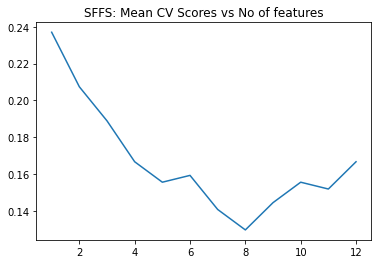

In [ ]:
#RUNNING SFFS FOR QDA
sffs = SFS(clf, 
          k_features=(1,13), 
          forward=True, 
          floating=True, # Floating
          scoring='neg_mean_squared_error',
          cv=5)
data.columns=['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect','labels']
X=data[['age','sex','chestpaintype','blood-pressure','serumcholesterol','fastingbloodsugar','electrocardiographicresults','maxhearrate',
                         'exerciseangina','oldpeak','slopepeakexercise','noofmajorvessels','reversable-defect']]
y=data['labels']

#FITTING SFFS
sffs = sffs.fit(X.values, y.values)
a=sffs.get_metric_dict()
n=[]
o=[]
# Compute the mean cross validation score
for i in np.arange(1,13):
    n.append(-np.mean(a[i]['cv_scores']))  
    
m=np.arange(1,13)

#PLOTTING SFFFS FOR KNN
fig4=plt.plot(m,n)
fig4=plt.title('SFFS: Mean CV Scores vs No of features')
fig4.figure.savefig('fig5.png', bbox_inches='tight')
print(pd.DataFrame.from_dict(sffs.get_metric_dict(confidence_interval=0.90)).T)
# Get the index of the minimum CV score
idx = np.argmin(n)
print ("No of features=",idx)
#Get the features indices for the best backward floating fit and convert to list
b=list(a[idx]['feature_idx'])
print(b)
print("#################################################################################")
# Index the column names. 
# Features from forward fit
print("Features selected in forward floating fit")
print(X.columns[b])

In [ ]:
#CREATING NEW MODEL AFTER SFFS- QDA
X_updated=data.iloc[:,b]
x_train, x_test, y_train, y_test = train_test_split(X_updated, y, test_size = 0.2)
clf.fit(x_train, y_train)
#testing the model
y_pred = clf.predict(x_test) 


In [ ]:
#CALCULATING METRICES AFTER SFFS- LDA
print("Accuracy score: " + str(accuracy_score(y_test, y_pred)))
cm=confusion_matrix(y_test, y_pred)
print("\nConfusion matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("F1 score: " + str(f1_score(y_test, y_pred,average='micro')))
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
accSQDA=str(accuracy_score(y_test, y_pred))
conf_sensitivitySQDA = (TP / float(TP + FN))
conf_specificitySQDA = (TN / float(TN + FP))
print(f'Sensitivity: {round(conf_sensitivitySQDA,2)}') 
print(f'Specificity: {round(conf_specificitySQDA,2)}') 

Accuracy score: 0.7777777777777778

Confusion matrix: 
[[23  9]
 [ 3 19]]
F1 score: 0.7777777777777778
Sensitivity: 0.86
Specificity: 0.72


In [ ]:
Final = [["NAIVE BAYES", accNB,accSNB, conf_sensitivityNB,conf_sensitivitySNB,conf_specificityNB,conf_specificitySNB], 
        ["KNN",accKNN,accSKNN, conf_sensitivityKNN,conf_sensitivitySKNN,conf_specificityKNN,conf_specificitySKNN ], 
        ["DESCION TREE", accDT,accSDT, conf_sensitivityDT,conf_sensitivitySDT,conf_specificityDT,conf_specificitySDT ], 
        ["LDA", accLDA,accSLDA, conf_sensitivityLDA,conf_sensitivitySLDA,conf_specificityLDA,conf_specificitySLDA ],
         ["QDA", accQDA,accSQDA, conf_sensitivityQDA,conf_sensitivitySQDA,conf_specificityQDA,conf_specificitySQDA ]]

In [ ]:
col_names = ["Accuracy", "Accuracy-SFFS","Sensitivity","Sensitivity-SFFS","Specificity","Specificity-SFFS"]

In [ ]:
from tabulate import tabulate
print(tabulate(Final, headers=col_names, tablefmt="fancy_grid"))

╒══════════════╤════════════╤═════════════════╤═══════════════╤════════════════════╤═══════════════╤════════════════════╕
│              │   Accuracy │   Accuracy-SFFS │   Sensitivity │   Sensitivity-SFFS │   Specificity │   Specificity-SFFS │
╞══════════════╪════════════╪═════════════════╪═══════════════╪════════════════════╪═══════════════╪════════════════════╡
│ NAIVE BAYES  │   0.814815 │        0.833333 │      0.769231 │           0.875    │      0.857143 │           0.8      │
├──────────────┼────────────┼─────────────────┼───────────────┼────────────────────┼───────────────┼────────────────────┤
│ KNN          │   0.777778 │        0.814815 │      0.653846 │           0.631579 │      0.892857 │           0.914286 │
├──────────────┼────────────┼─────────────────┼───────────────┼────────────────────┼───────────────┼────────────────────┤
│ DESCION TREE │   0.740741 │        0.851852 │      0.538462 │           0.791667 │      0.928571 │           0.9      │
├──────────────┼────────